1. Интерполяция в форме Лагранжа. 
2. Интерполяция в форме Ньютона.
3. Кубические слайсы.

## Лабораторная работа 4 "Интерполяция". Шаргин Иван

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
from functools import reduce

## 1. Интерполяция в форме Лагранжа

In [44]:
def Lagrange_interpolation(x_arr, f_arr, area):
    '''возвращает значения интерполяционного многочлена на точках area'''
    Polynom_on_area = []
    for x in area:
        P = 0 
        for i in range(f_arr.size):
            multipliers = [(x-x_arr[j]) / (x_arr[i] - x_arr[j]) for j in range(x_arr.size) if i != j]
            l_i = reduce(lambda x, y: x * y, multipliers)
            P += f_arr[i] * l_i
        Polynom_on_area.append(P)
    
    return(np.array(Polynom_on_area))

In [45]:
def f_test(x):
    return np.sin(x) / x

Text(0.5, 1.0, "Lagrange's interpolation")

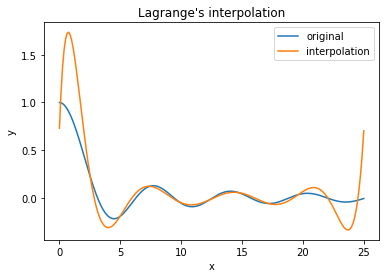

In [120]:
x = np.linspace(0.01, 25, 200)
y = f_test(x)
plt.plot(x, y, label = 'original')
plt.xlabel('x')
plt.ylabel('y')

x_arr = np.linspace(0.1, 24.5, 11)
f_arr = f_test(x_arr)
area = x
interpolation = Lagrange_interpolation(x_arr, f_arr, area)
plt.plot(area, interpolation, label = 'interpolation')
plt.legend()
plt.title("Lagrange's interpolation")

## 2. Интерполяция в форме Ньютона

In [94]:
def divided_difference(x_arr, f_arr):
    '''возвращает разделенную разность'''
    N = x_arr.size
    F = 0
    if N == 1:
        return f_arr[0]
    for j in range(N):
        denominator_parts = [x_arr[j] - x_arr[i] for i in range(N) if i != j]
        denominator = reduce(lambda x, y: x * y, denominator_parts)
        F += f_arr[j] / denominator
    
    return F          

In [101]:
x_arr = np.array([1, 2])
f_arr = np.array([10, 25])
divided_difference(x_arr, f_arr)

15.0

In [113]:
def Newton_interpolation_one_point(x_arr, f_arr, x):
    '''возвращает значение интерполяционного многочлена на точке x'''
    N = x_arr.size
    P = 0
    for i in range(N):
        if i == 0:
            P += f_arr[i]
        else:
            multipliers = [x - x_arr[j] for j in range(i)]
            m = reduce(lambda x, y: x * y, multipliers)
            P += divided_difference(x_arr[0:i + 1], f_arr[0:i + 1]) * m
    return P        

In [104]:
Newton_interpolation_one_point(x_arr, f_arr, 0)

[-1]


-5.0

In [105]:
def Newton_interpolation(x_arr, f_arr, area):
    '''возвращает значения интерполяционного многочлена на отрезке area'''
    return np.array(Newton_interpolation_one_point(x_arr, f_arr, area))        

In [54]:
x = np.array([1, 2, 3])
print(x[0:1+1])

[1 2]


Text(0.5, 1.0, "Newton's interpolation")

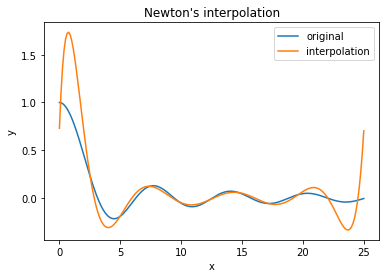

In [126]:
x = np.linspace(0.01, 25, 200)
y = f_test(x)
plt.plot(x, y, label = 'original')
plt.xlabel('x')
plt.ylabel('y')

x_arr = np.linspace(0.1, 24.5, 11)
f_arr = f_test(x_arr)
area = x
interpolation = Newton_interpolation(x_arr, f_arr, area)
plt.plot(area, interpolation, label = 'interpolation')
plt.legend()
plt.title("Newton's interpolation")

Теперь реализуем добавление еще одной точки

In [141]:
def Newton_interpolation_add_point(area, interpolation, x_new, f_new, x_arr, f_arr):
    '''Добавляет точку к интерполяции в форме Ньютона'''
    x_arr = np.hstack((x_arr, np.array([x_new])))
    f_arr = np.hstack((f_arr, np.array([f_new])))
    for i in range(area.size):
        multipliers = [area[i] - x_arr[j] for j in range(x_arr.size - 1)]
        m = reduce(lambda x, y: x * y, multipliers)
        interpolation[i] += divided_difference(x_arr, f_arr) * m
    
    return interpolation

Text(0.5, 1.0, "Newton's interpolation")

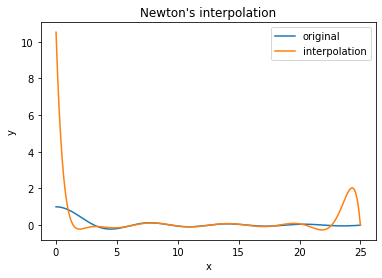

In [156]:
x = np.linspace(0.01, 25, 200)
y = f_test(x)
plt.plot(x, y, label = 'original')
plt.xlabel('x')
plt.ylabel('y')

x_arr = np.linspace(1, 25, 11)
f_arr = f_test(x_arr)
area = x
old_interpolation = Newton_interpolation(x_arr, f_arr, area)
plt.plot(area, oldinterpolation, label = 'interpolation')
plt.legend()
plt.title("Newton's interpolation")

Text(0.5, 1.0, 'With new point x = 0.01')

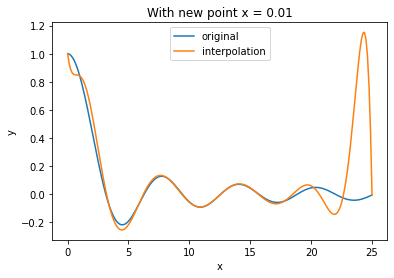

In [157]:
x = np.linspace(0.01, 25, 200)
y = f_test(x)
plt.plot(x, y, label = 'original')
plt.xlabel('x')
plt.ylabel('y')

interpolation = Newton_interpolation_add_point(area, old_interpolation, 0.01, f_test(0.01), x_arr, f_arr)
plt.plot(area, interpolation, label = 'interpolation')
plt.legend()
plt.title("With new point x = 0.01")

## 3. Кубические сплайны